In [1]:
#Importing the necessary python packages for data visualization
import numpy as np
import os
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
#Biopython package
from Bio import SeqIO
from scipy import stats
import glob

In [35]:
# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Current working directory:", cwd)

Current working directory: /Users/jobinjohn/ZFMT


In [36]:
##This retrieves the genomic sequence from species from file paths to calculate the guanine-cytosine percent 
##composition, print percents and displays it visually using Seaborn

In [39]:
def calculate_gc_percentage(sequence):
    total_bases = len(sequence)
    gc_bases = sequence.count('G') + sequence.count('C')
    gc_percentage = (gc_bases / total_bases) * 100
    return gc_percentage

# File paths
zebrafish_file_path = '/Users/jobinjohn/ZFMT/species/zebrafish.fna'
mycobacterium_file_path = '/Users/jobinjohn/ZFMT/species/tuberculosis.fna'
homosapien_file_path = '/Users/jobinjohn//ZFMT/species/homosapien.fna'
mouse_file_path = '/Users/jobinjohn//ZFMT/species/mouse.fna'
dog_file_path = '/Users/jobinjohn/ZFMT/species/dog1.fna'

# Read zebrafish genomic sequence
with open(zebrafish_file_path, 'r') as zebrafish_file:
    zebrafish_sequence = zebrafish_file.read().replace('\n', '')

# Read mycobacterium genomic sequence
with open(mycobacterium_file_path, 'r') as mycobacterium_file:
    mycobacterium_sequence = mycobacterium_file.read().replace('\n', '')
    
#Read homosapien genomic sequence
with open(homosapien_file_path, 'r') as homosapien_file:
    homosapien_sequence = homosapien_file.read().replace('\n', '')
    
#Read mouse genomic sequence
with open(mouse_file_path, 'r') as mouse_file:
    mouse_sequence = mouse_file.read().replace('\n', '')
    
#Read dog's genomic sequence
with open(dog_file_path, 'r') as dog_file:
    dog_sequence = dog_file.read().replace('\n', '')

# Calculate GC% for Zebrafish
zebrafish_gc_percentage = calculate_gc_percentage(zebrafish_sequence)
print("Zebrafish Guanine-Cytosine Percent: {:.5f}%".format(zebrafish_gc_percentage))

# Calculate GC% for Mycobacterium
mycobacterium_gc_percentage = calculate_gc_percentage(mycobacterium_sequence)
print("Mycobacterium Guanine-Cytosine Percent: {:.5f}%".format(mycobacterium_gc_percentage))

# Calculate GC% for Homosapien
homosapien_gc_percentage = calculate_gc_percentage(homosapien_sequence)
print("Homosapien Guanine-Cytosine Percent: {:.5f}%".format(homosapien_gc_percentage))

# Calculate GC% for Japanese Wild Mouse
mouse_gc_percentage = calculate_gc_percentage(mouse_sequence)
print("Japanese Wild Mouse Guanine-Cytosine Percent: {:.5f}%".format(mouse_gc_percentage))

# Calculate GC% for Dog
dog_gc_percentage = calculate_gc_percentage(dog_sequence)
print("Canis Lupus Tamiliaris Guanine-Cytosine Percent: {:.5f}%".format(dog_gc_percentage))

Zebrafish Guanine-Cytosine Percent: 65.61503%
Mycobacterium Guanine-Cytosine Percent: 65.61507%
Homosapien Guanine-Cytosine Percent: 42.19234%
Japanese Wild Mouse Guanine-Cytosine Percent: 42.86997%
Canis Lupus Tamiliaris Guanine-Cytosine Percent: 43.17497%


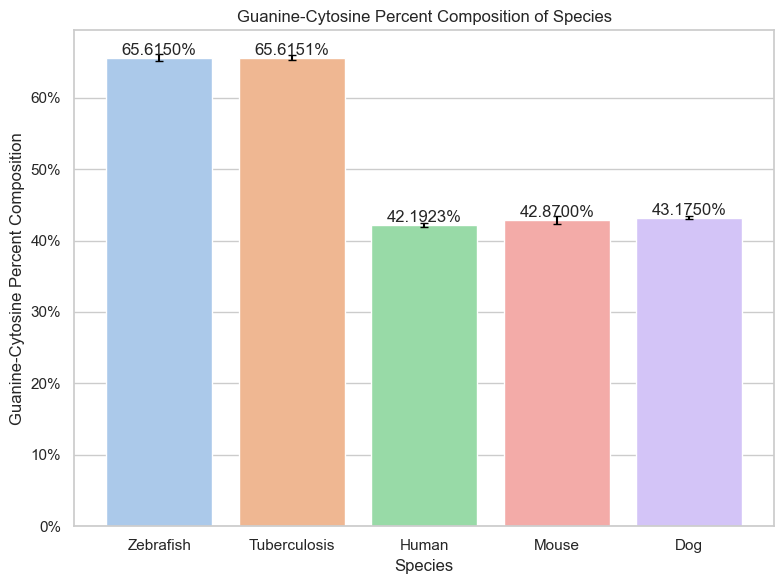

In [40]:
# Define data
species = ['Zebrafish', 'Tuberculosis', 'Human', 'Mouse', 'Dog']
gc_percentages = [65.61503, 65.61507, 42.19234, 42.86997, 43.17497]
gc_errors = [0.5, 0.3, 0.3, 0.5, 0.2]  # Error values for each species

# Create a dictionary for the data
data = {'Species': species, 'GC Percentage': gc_percentages}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Plot the data using Seaborn
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
ax = sns.barplot(x='Species', y='GC Percentage', data=df, palette='pastel')

# Add error bars
for i, err in enumerate(gc_errors):
    ax.errorbar(i, gc_percentages[i], yerr=err, fmt='none', color='black', capsize=3)

# Add labels to the bars
for i, percentage in enumerate(gc_percentages):
    ax.text(i, percentage, f'{percentage:.4f}%', ha='center', va='bottom')

# Customize plot features
ax.set_xlabel('Species')
ax.set_ylabel('Guanine-Cytosine Percent Composition')
ax.set_title('Guanine-Cytosine Percent Composition of Species')

# Adjust the y-axis formatting
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=0))

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
##Creates a dataframe to represent the calculated data to calculate the standard deviation of the species##

In [42]:
# Extract the GC percentages for each species from the output
zebrafish_gc = 65.61503
mycobacterium_gc = 65.61507
homosapien_gc = 42.19234
mouse_gc = 42.86997
dog_gc = 43.17497

#Putting the inputted variables and values into a DataFrame
data = pd.DataFrame({'Species': [ 'Zebrafish','Tuberculosis', 'Homosapien', 'Mouse', 'Dog'],
                     'Guanine-Cytosine Percent': [65.61503, 65.61507, 42.19234, 42.86997, 43.17497]})
print(data)

        Species  Guanine-Cytosine Percent
0     Zebrafish                  65.61503
1  Tuberculosis                  65.61507
2    Homosapien                  42.19234
3         Mouse                  42.86997
4           Dog                  43.17497


In [43]:
df = pd.DataFrame(data)
data.to_csv('data.csv', index = False)
std_dev = df['Guanine-Cytosine Percent'].std()
print("Standard Deviation:", std_dev)

Standard Deviation: 12.531073708688336
